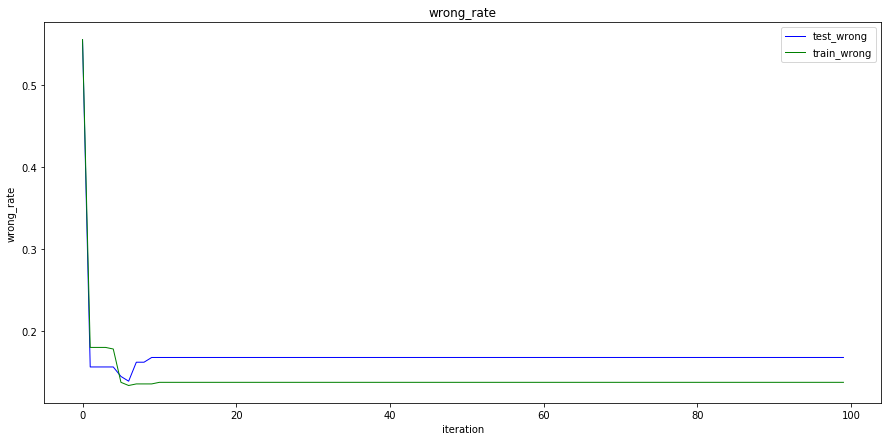

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

X,y = load_svmlight_file('australian_scale.txt')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 5)

def loss_fun(y,predict):
	sum = 0
	for i in np.arange(len(y)):
		
		cost = max(0,1-y[i]*predict[i])
		sum+= cost
	return sum
	
	
def linear_classify(train,W,b):
	prediction = np.zeros(train.shape[0])
	for i in np.arange(train.shape[0]):
		pred = (W.T).dot(train[i])+b
		prediction[i] = pred
	return prediction
	
	
def classify_model(X_train,y_train,X_test,y_test,eta,iteration,C,b):
	W = np.zeros(X_train.shape[1])
	X_train =X_train.toarray()
	X_test = X_test.toarray()
	test_showdata = []
	train_showdata =[]
	for i in np.arange(iteration):
		predict = linear_classify(X_train,W,b)
		
		prediction = np.zeros(X_train.shape[0])
		for j in np.arange(len(predict)):
			if predict[j]>=0:
				prediction[j] = 1
			else:
				prediction[j] = -1
		loss_sum = loss_fun(y_train,predict)
		wrong = 0
		for j in np.arange(len(prediction)):
			if prediction[j] !=y_train[j]:
				wrong+=1
		
		#print('wrong rate: ' +str(float(wrong)/len(prediction)))
		
		test_predict = linear_classify(X_test,W,b)
		t_prediction = np.zeros(X_test.shape[0])
		for j in np.arange(len(test_predict)):
			if test_predict[j]>=0:
				t_prediction[j] = 1
			else:
				t_prediction[j] = -1
		t_wrong = 0
		for j in np.arange(len(t_prediction)):
			if t_prediction[j] != y_test[j]:
				t_wrong+=1 
		#print('test wrong rate: ' + str(float(t_wrong)/len(t_prediction)))
		
		D =np.zeros(X_train.shape[1])
		for j in np.arange(X_train.shape[0]):
			one = np.zeros(X_train.shape[1])
			if (1-y_train[j]*( (W.T).dot(X_train[j])))>=0:
				for k in np.arange(len(X_train[j])):
					one[k] = y_train[j]*X_train[j][k]
					
				
			for k in np.arange(len(D)):
				D[k] += -C*one[k]
		D= W +D
		W = W-eta*D
		test_showdata.append(float(t_wrong)/len(t_prediction))
		train_showdata.append(float(wrong)/len(prediction))
	fig = plt.figure(figsize = (15,7))
	ax = fig.add_subplot(111)
	ax.set_title('wrong_rate')
	ax.set_xlabel('iteration')
	ax.set_ylabel('wrong_rate')
	plt.plot(test_showdata,c='b',linewidth = 1,label = 'test_wrong')
	plt.plot(train_showdata,c = 'g',linewidth = 1,label = 'train_wrong' )
	plt.legend(loc = 'best')
	plt.show()
classify_model(X_train,y_train,X_test,y_test,0.0003,100,1,0)